# Text Representation

In [107]:
import pandas as pd

In [108]:
import pandas as pd

# Fetch preprocessed data
model_data = pd.read_csv("data/keywords.csv")

# Display the DataFrame before dropping the column
print("Before dropping the column:")
print(model_data.head())

# Drop the 'Unnamed: 0' column
model_data = model_data.drop(columns=['Unnamed: 0'])

Before dropping the column:
   Unnamed: 0       Id                                               Name  \
0           0  1100003                                         the prince   
1           1  1100004  sermons from duke chapel: voices from "a great...   
2           3  1100009                           the idea of a university   
3           4  1100010  caring and curing: health and medicine in the ...   
4           6  1100013  the alamo remembered: tejano accounts and pers...   

               Authors  PublishYear                       Publisher  \
0  niccolò_machiavelli         1998     university_of_chicago_press   
1  william_h._willimon         2005     duke_university_press_books   
2    john_henry_newman         1996           yale_university_press   
3    ronald_l._numbers         1997  johns_hopkins_university_press   
4     timothy_matovina         1995       university_of_texas_press   

                                         Description  Rating  pagesNumber  \
0  th

In [109]:
# Display the DataFrame after dropping the column
print("\nAfter dropping the column:")
print(model_data.head())


After dropping the column:
        Id                                               Name  \
0  1100003                                         the prince   
1  1100004  sermons from duke chapel: voices from "a great...   
2  1100009                           the idea of a university   
3  1100010  caring and curing: health and medicine in the ...   
4  1100013  the alamo remembered: tejano accounts and pers...   

               Authors  PublishYear                       Publisher  \
0  niccolò_machiavelli         1998     university_of_chicago_press   
1  william_h._willimon         2005     duke_university_press_books   
2    john_henry_newman         1996           yale_university_press   
3    ronald_l._numbers         1997  johns_hopkins_university_press   
4     timothy_matovina         1995       university_of_texas_press   

                                         Description  Rating  pagesNumber  \
0  the most famous book on politics ever written ...    3.82          151   


---
### Vectorize the keywords summary using TF-IDF
- Convert the keywords for each book into a numeric vector, based on the frequency of each word in the book's keywords
- Keep token pattern such that tokens with underscore are not ignored.
- Remove tokens occuring less than 3 times or occur in more than 60% of the documents (common tokens).
- Remove english language stop words

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word',
                        min_df=3,
                        max_df = 0.6,
                        stop_words="english",
                        encoding = 'utf-8', 
                        token_pattern=r"(?u)\S\S+")
tfidf_encoding = tfidf.fit_transform(model_data["keywords"])

In [111]:
# Preview first 100 words in the vocabulary
print(tfidf.get_feature_names_out()[1:100])

['adventure' 'album' 'art' 'arthur' 'artists' 'astrologer' 'astrologers'
 'astrological' 'astrology' 'author' 'authors' 'balzic' 'biography' 'book'
 'books' 'buddhism' 'budo' 'burke' 'century' 'children' 'chinese'
 'christian' 'christmas' 'church' 'coast' 'detective' 'doug' 'duras'
 'economic' 'edward' 'elephant' 'erotic' 'essays' 'faith' 'family'
 'fiction' 'films' 'goddess' 'guide' 'harry' 'harrys' 'healing' 'history'
 'industrial' 'james' 'judith' 'judo' 'kafka' 'language' 'library' 'life'
 'literary' 'literature' 'mackle' 'maria' 'martial' 'mary' 'mrs' 'murder'
 'newman' 'novel' 'novels' 'painting' 'parents' 'peter' 'philosophy'
 'photographs' 'photos' 'poems' 'poet' 'poetry' 'poets' 'poirot' 'police'
 'published' 'reading' 'recipes' 'religious' 'revolution' 'revolutionary'
 'room' 'routledge' 'shes' 'solar' 'spanish' 'spiritual' 'sporting'
 'stephanie' 'stories' 'tale' 'tales' 'testament' 'text' 'translation'
 'une' 'verse' 'wojcik' 'woman' 'writer']


In [112]:
# Lets find representation of a new book's keywords in the existing vocabulary space
tfidf.transform(["looking for alaska by john green"]).toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [113]:
tfidf_encoding.toarray().shape

(500, 103)

---
### Visualize the TF-IDF word embeddings

In [114]:
tfidf_df = pd.DataFrame(tfidf_encoding.toarray(), index=model_data["Name"], columns=tfidf.get_feature_names_out())

In [115]:
# Find top 50 books with maximum tf-idf total score
tfidf_df["total"]= tfidf_df.sum(axis=1)
tfidf_df = tfidf_df.sort_values("total", ascending=False)
del tfidf_df["total"]
tfidf_df.head()


,1930s,adventure,album,art,arthur,artists,astrologer,astrologers,astrological,astrology,...,text,translation,une,verse,wojcik,woman,writer,writers,writing,writings
Name,,,,,,,,,,,,,,,,,,,,,
the triple thinkers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476688
bath (chic simple) (chic simple components) (chic simple components),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
further reflections on the revolution in france,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
select works of edmund burke: reflections on the revolution in france,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
classical budo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [116]:
len(tfidf_df)

500

In [117]:
# Leave first few words containing years and select top 50 books
tfidf_df_preview = tfidf_df.iloc[:50].copy()
tfidf_df_preview = tfidf_df_preview.stack().reset_index()
tfidf_df_preview = tfidf_df_preview.rename(columns={0:'tfidf', 'Name': 'book','level_1': 'term'})

tfidf_df_preview

,book,term,tfidf
0,the triple thinkers,1930s,0.0
1,the triple thinkers,adventure,0.0
2,the triple thinkers,album,0.0
3,the triple thinkers,art,0.0
4,the triple thinkers,arthur,0.0
...,...,...,...
5145,body(chic simple) (chic simple component) (chi...,woman,0.0
5146,body(chic simple) (chic simple component) (chi...,writer,0.0
5147,body(chic simple) (chic simple component) (chi...,writers,0.0
5148,body(chic simple) (chic simple component) (chi...,writing,0.0


In [118]:

tfidf_df_preview = tfidf_df_preview.sort_values(by=['book','tfidf'], ascending=[True,False]).groupby(['book']).head(10)
display(tfidf_df_preview)

,book,term,tfidf
1969,always a body to trade,balzic,0.57735
2016,always a body to trade,murder,0.57735
2031,always a body to trade,police,0.57735
1957,always a body to trade,1930s,0.00000
1958,always a body to trade,adventure,0.00000
...,...,...,...
1134,wild galaxy: selected science fiction stories,adventure,0.00000
1135,wild galaxy: selected science fiction stories,album,0.00000
1136,wild galaxy: selected science fiction stories,art,0.00000
1137,wild galaxy: selected science fiction stories,arthur,0.00000


In [119]:
# Find books with term "london"
tfidf_df_preview[tfidf_df_preview['term'].str.contains('church')]

,book,term,tfidf
2599,stepping stones of the steward: a faith journe...,church,0.562335
2702,the psalms: new catholic version,church,0.569694


In [120]:
# Find book names with word mystery
tfidf_df_preview[tfidf_df_preview['book'].str.contains('coast')].head(5)

,book,term,tfidf


In [121]:
def process_word_matrix(word_vec):
    # Remove underscores in terms
    word_vec.term = word_vec.term.str.replace('_',' ')

    # Remove terms with zero tfidf score
    word_vec = word_vec[word_vec.tfidf > 0]
    
    return word_vec

tfidf_vec = process_word_matrix(tfidf_df_preview.copy())    
tfidf_vec.iloc[0:50]

,book,term,tfidf
1969,always a body to trade,balzic,0.577350
2016,always a body to trade,murder,0.577350
2031,always a body to trade,police,0.577350
2381,always a body to trade (mario balzic detective...,balzic,0.577350
2428,always a body to trade (mario balzic detective...,murder,0.577350
2443,always a body to trade (mario balzic detective...,police,0.577350
3589,an outside chance: classic & new essays on sport,sporting,0.610506
3503,an outside chance: classic & new essays on sport,adventure,0.568049
3577,an outside chance: classic & new essays on sport,published,0.551908
3692,an outside chance: essays on sport,sporting,0.610506


- For each book, we will rank its terms based on its tf-idf score. Term with maximum score within the document will get rank 1.
- Two or more terms may have same tf-idf score, such terms will overlap in the heatmap.

In [122]:
import altair as alt
alt.renderers.enable('mimetype')
grid = alt.Chart(tfidf_vec).encode(
    x = 'rank:O',
    y = 'book:N'
).transform_window(
    rank = "dense_rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["book"],
)
heatmap = grid.mark_rect(size=5).encode(
    alt.Color('tfidf:Q', scale=alt.Scale(scheme='redpurple'))
)
text = grid.mark_text(align='center', baseline='middle', lineBreak='').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)
(heatmap+text).properties(width = 800)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


---
### Cosine Similarity between books vector representation

In [123]:
from sklearn.metrics.pairwise import cosine_similarity
book_cosine_sim = cosine_similarity(tfidf_encoding, tfidf_encoding)

In [124]:
# Preview Similarity Matrix
book_cosine_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

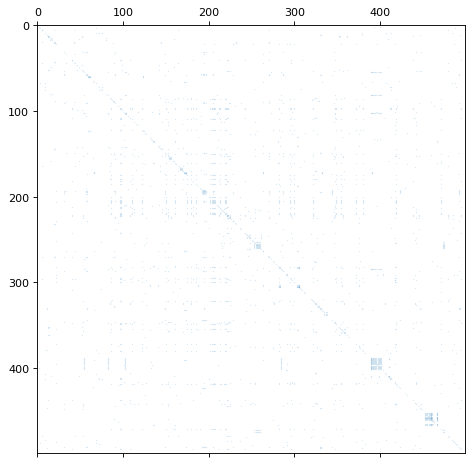

In [125]:
# Vidualize similarity between books
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6), dpi=80)
plt.spy(book_cosine_sim, precision = 0.1, markersize = 0.04)
plt.tight_layout()
plt.show()


---
### Recommendation
- Given a book name, find top n similar books based on cosine similarity score.
1) Series Information
2) Other Books In Numbered Series
3) Theme
4) Author

In [126]:
books = pd.Series(model_data['Name'])

def recommend_books_similar_to(book_name, n=5, cosine_sim_mat=book_cosine_sim):
    # get index of the imput book
    input_idx = books[books == book_name].index[0]   
    # Find top n similar books with decreasing order of similarity score
    top_n_books_idx = list(pd.Series(cosine_sim_mat[input_idx]).sort_values(ascending = False).iloc[1:n+1].index)
    # [1:6] to exclude 0 (index 0 is the input movie itself)
    
    books_list = list(books)
    recommended_books = [books[i] for i in top_n_books_idx]
        
    return recommended_books

In [127]:
def recommend_bookIDs_similar_to(book_name, n=5, cosine_sim_mat=book_cosine_sim):
    # Get index of the input book
    input_idx = books[books == book_name].index[0]   
    
    # Find top n similar books with decreasing order of similarity score
    top_n_books_idx = list(pd.Series(cosine_sim_mat[input_idx]).sort_values(ascending=False).iloc[1:n+1].index)
    
    # Get the ID of the input book
    input_book_id = model_data['Id'].iloc[input_idx]
    
    # Create a list of recommended book IDs
    recommended_ids = model_data['Id'].iloc[top_n_books_idx].tolist()
    
    # Return the input book ID plus the list of recommended IDs
    return input_book_id, recommended_ids

In [128]:
# Recommendations with series information
print("\033[1m{}\033[0m".format("Recommendation (Series Information) based on the read: baby's little engine that could)"))
display(recommend_books_similar_to("baby's little engine that could", 5))


Recommendation (Series Information) based on the read: baby's little engine that could)


['4 play: trainspotting, ecstasy, filth and marabou stork nightmares',
 'calling all cooks two',
 "cliffsnotes on rand's atlas shrugged",
 'the wonderful thing about hiccups',
 'the language of recovery: a blue mountain arts collection ("language of ... " series)']

In [129]:
# Recommendations with series information
print("\033[1m{}\033[0m".format("Recommendation (Series Information) based on the read: baby's little engine that could)"))
display(recommend_bookIDs_similar_to("baby's little engine that could", 5))


Recommendation (Series Information) based on the read: baby's little engine that could)


(1100074, [1100552, 1100724, 1100101, 1100230, 1100412])

In [130]:
# Recommendations with series information
print("\033[1m{}\033[0m".format("Recommendation (Series Information) based on the read: bright hunger)"))
display(recommend_books_similar_to("bright hunger", 5))


Recommendation (Series Information) based on the read: bright hunger)


['even as we speak: new essays, 1993-2000',
 'the columbus myth: did men of bristol reach america before columbus',
 'norton anthology of world masterpieces',
 'writing magic: creating stories that fly',
 'the triple thinkers']

In [131]:
# Initialize a new column for recommended IDs
model_data['recommended_ids'] = None



# Iterate over each row in model_data
for index, row in model_data.iterrows():
    book_name = row['Name']
    _, recommended_ids = recommend_bookIDs_similar_to(book_name)  # Get recommended IDs
    model_data.at[index, 'recommended_ids'] = recommended_ids  # Update the DataFrame

# Optionally save the updated DataFrame to a new CSV file
model_data.to_csv("data/keywords.csv", index=False)
print("Updated DataFrame with recommended IDs saved to data/keywords.csv")

Updated DataFrame with recommended IDs saved to data/keywords.csv
